# Clustering Analysis without Standardisation

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import (
    KMeans,
)  # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl  # PyLab is a convenience module that bulk imports matplotlib.

## Importing & Slicing

In [119]:
path = r"/Users/patel/Documents/CF-Data Anaylst Course/portfolio_projects/mbs_analysis/datasets/"

df_mbs_sa3_service_1_np = pd.read_pickle(
    os.path.join(
        path, "clean_datasets/2014-22_combined_service_1_categories_no_pivot.pkl"
    )
)
df_mbs_sa3_service_1_np.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103592 entries, 0 to 229389
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            103592 non-null  int64  
 1   StateTerritory                  103592 non-null  object 
 2   GeographicCode                  103592 non-null  object 
 3   GeographicAreaName              103592 non-null  object 
 4   GeographicGroup                 103592 non-null  object 
 5   ServiceLevel                    103592 non-null  object 
 6   Service                         103592 non-null  object 
 7   DemographicGroup                103592 non-null  object 
 8   MBS_per_100                     103592 non-null  float64
 9   No_of_patients                  103592 non-null  Int32  
 10  No_of_services                  103592 non-null  Int64  
 11  %_People_had_service            103592 non-null  float64
 12  Services_100_peo

In [125]:
# Calculating medicare rebate per person per year
df_mbs_sa3_service_1_np.loc[
    df_mbs_sa3_service_1_np["No_of_patients"] == 0, "MBS_per_person"
] = 0
df_mbs_sa3_service_1_np.loc[
    df_mbs_sa3_service_1_np["No_of_patients"] != 0, "MBS_per_person"
] = (
    df_mbs_sa3_service_1_np["Total_mbs_paid_$"]
    / df_mbs_sa3_service_1_np["No_of_patients"]
)

df_mbs_sa3_service_1_np["Total_Provider_pp_per_service"] = df_mbs_sa3_service_1_np[
    "Total_provider_fees_$"
] / (
    df_mbs_sa3_service_1_np["No_of_patients"]
    * df_mbs_sa3_service_1_np["No_of_service_per_person"]
)
df_mbs_sa3_service_1_np["MBS_Rebate_pp_per_service"] = df_mbs_sa3_service_1_np[
    "Total_mbs_paid_$"
] / (
    df_mbs_sa3_service_1_np["No_of_patients"]
    * df_mbs_sa3_service_1_np["No_of_service_per_person"]
)

### Extracting All Person Dataset

In [126]:
df_mbs_sa3_all_person = df_mbs_sa3_service_1_np[
    df_mbs_sa3_service_1_np["Population_demographic"] == "All persons"
]
df_mbs_sa3_all_person.shape

(14860, 55)

In [127]:
df_mbs_sa3_all_person.columns

Index(['Year', 'StateTerritory', 'GeographicCode', 'GeographicAreaName',
       'GeographicGroup', 'ServiceLevel', 'Service', 'DemographicGroup',
       'MBS_per_100', 'No_of_patients', 'No_of_services',
       '%_People_had_service', 'Services_100_people', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'ERP', 'key_x', 'Out_of_Pocket',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_person',
       'No_of_service_per_person', 'Out_of_pocket_cost_per_service',
       'Patient_ERP_Flag', 'negative_income', 'no_income_or_not_applicable',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000',
       'average_income_$169000+', 'Population_demographic', 'Population',
       '%_out_of_pocket_by_$5200', '%_out_of_pocket_by_$13000',
       '%_out_of_pocket_

In [85]:
df_mbs_sa3_numerical_val = df_mbs_sa3_all_person[
    [
        "Total_mbs_paid_$",
        "Total_provider_fees_$",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
    ]
]

### 2. The elbow technique

In [86]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data.
kmeans = [
    KMeans(n_clusters=i) for i in num_cl
]  # Defines k-means clusters in the range assigned above.

In [87]:
score = [
    kmeans[i].fit(df_mbs_sa3_numerical_val).score(df_mbs_sa3_numerical_val)
    for i in range(len(kmeans))
]  # Creates a score that represents
# a rate of variation for the given cluster option.

score

[-4.387249497976739e+18,
 -1.581528787144468e+18,
 -7.439179505291924e+17,
 -4.407041038614565e+17,
 -2.954088885436494e+17,
 -2.173624236920542e+17,
 -1.6414658129234192e+17,
 -1.3305587660710277e+17,
 -1.0965683101296442e+17]

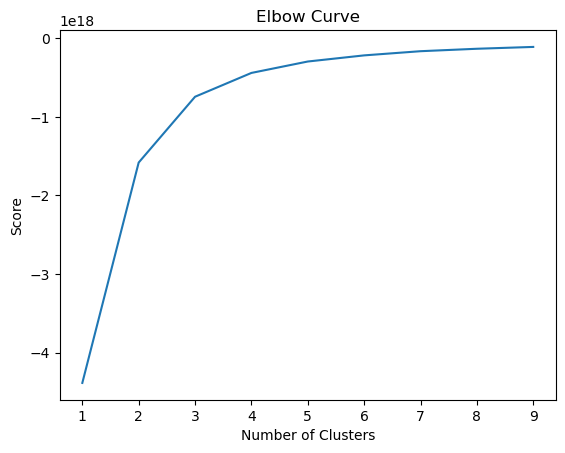

In [88]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl, score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")
pl.show()

#####  In this example, there's a large jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 4.

### 3. k-means clustering

In [89]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3)
# Fit the k-means object to the data.

kmeans.fit(df_mbs_sa3_numerical_val)

KMeans(n_clusters=3)

In [90]:
df_mbs_sa3_numerical_val["clusters"] = kmeans.fit_predict(df_mbs_sa3_numerical_val)

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_26836/232422613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mbs_sa3_numerical_val["clusters"] = kmeans.fit_predict(df_mbs_sa3_numerical_val)


In [91]:
df_mbs_sa3_numerical_val.head()

,Total_mbs_paid_$,Total_provider_fees_$,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_per_service,clusters
4,3779415.0,4586290.0,28.081822,1.907841,14.719162,0
11,8274560.0,10866882.0,86.673643,2.177940,39.796162,0
18,20518944.0,26114939.0,69.221382,5.677037,12.193224,2
25,83700.0,84655.0,0.472071,1.653979,0.285415,0
32,5371498.0,8561520.0,131.558149,2.660879,49.441608,0


In [92]:
df_mbs_sa3_numerical_val["clusters"].value_counts()

0    10834
2     3373
1      653
Name: clusters, dtype: int64

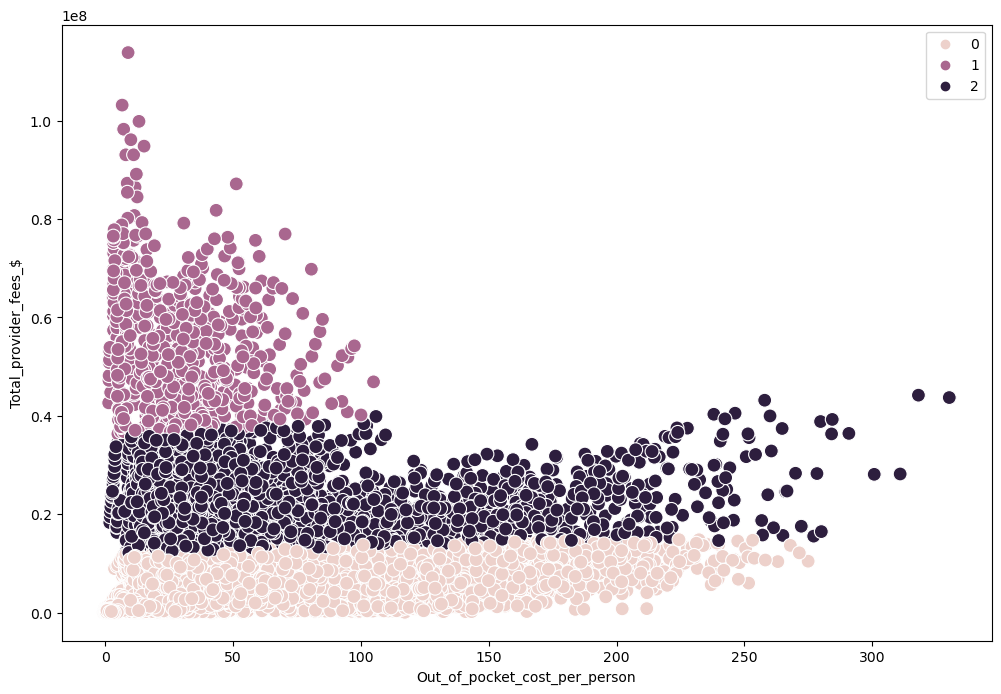

In [94]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_mbs_sa3_numerical_val["Out_of_pocket_cost_per_person"],
    y=df_mbs_sa3_numerical_val["Total_provider_fees_$"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Out_of_pocket_cost_per_person")  # Label x-axis.
plt.ylabel("Total_provider_fees_$")  # Label y-axis.
plt.show()

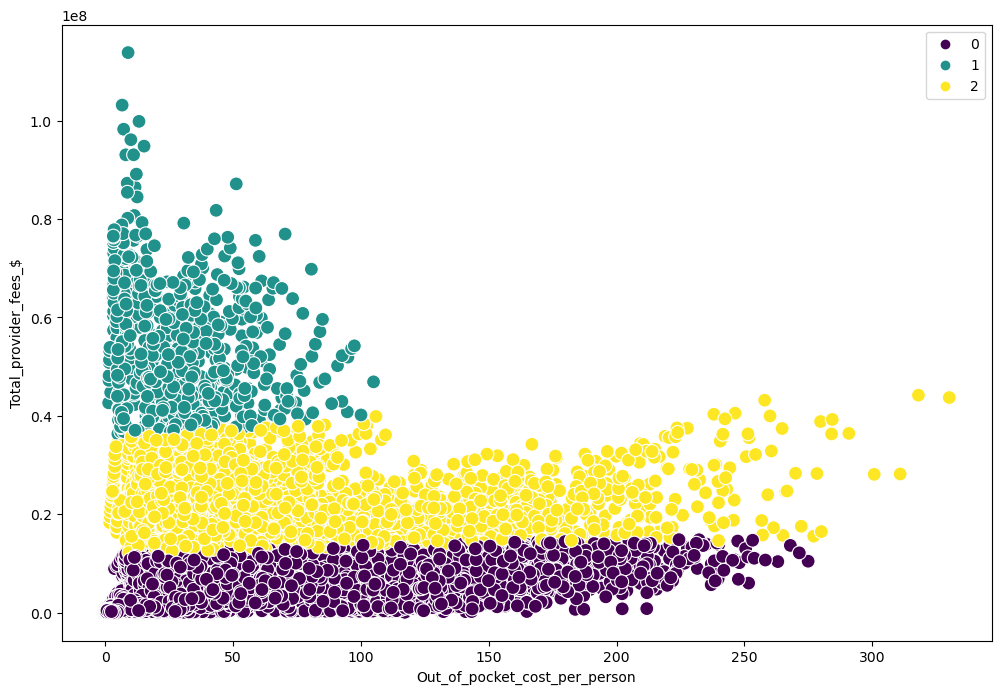

In [102]:
# Define the cluster labels you want to keep
clusters_to_keep = [0, 1, 2]

# Create a mask for rows where the kmeans.labels_ is in clusters_to_keep
mask = [label in clusters_to_keep for label in kmeans.labels_]

# Create a new DataFrame with only the desired clusters
filtered_df = df_mbs_sa3_numerical_val[mask]

# Now the kmeans.labels_ also needs to be filtered
filtered_labels = kmeans.labels_[mask]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=filtered_df["Out_of_pocket_cost_per_person"],
    y=filtered_df["Total_provider_fees_$"],
    hue=filtered_labels,
    s=100,
    palette="viridis",  # Optionally, specify a color palette for clarity
)

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Out_of_pocket_cost_per_person")  # Label x-axis.
plt.ylabel("Total_provider_fees_$")  # Label y-axis.
plt.show()

    Cluster 0 : Low provider fees - ranges in OOP per person from 0-280
    Cluster 2 : Total provider fees between 0.2e8 to 0.37e8, OOP is widespread
    Cluster 1 : Total provider fees is more than 0.375, OOP per person is low

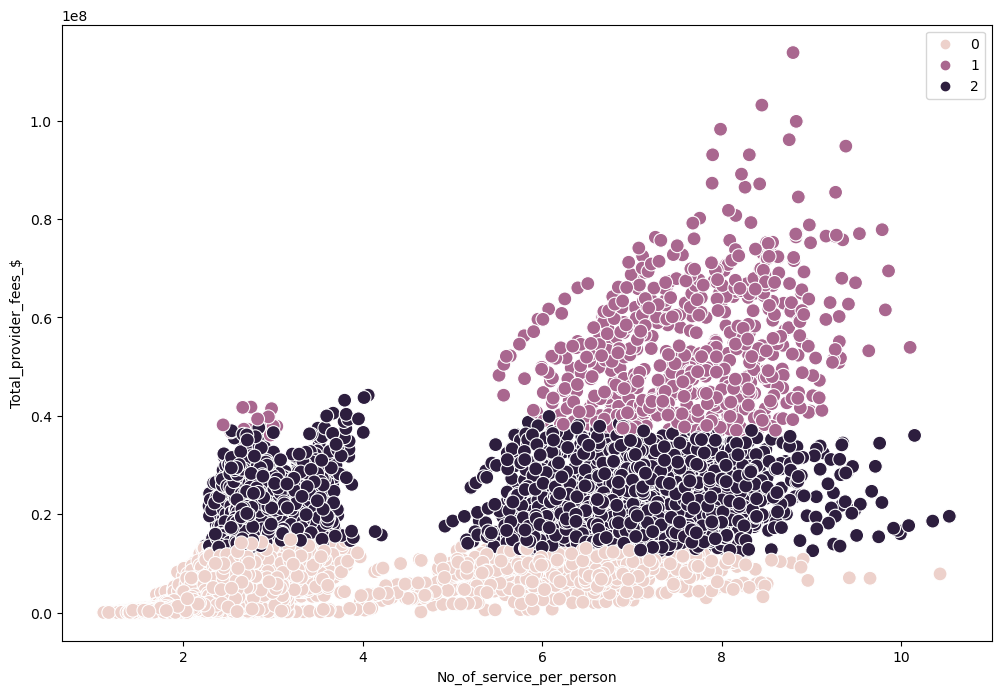

In [110]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_mbs_sa3_numerical_val["No_of_service_per_person"],
    y=df_mbs_sa3_numerical_val["Total_provider_fees_$"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Total_provider_fees_$")  # Label y-axis.
plt.show()

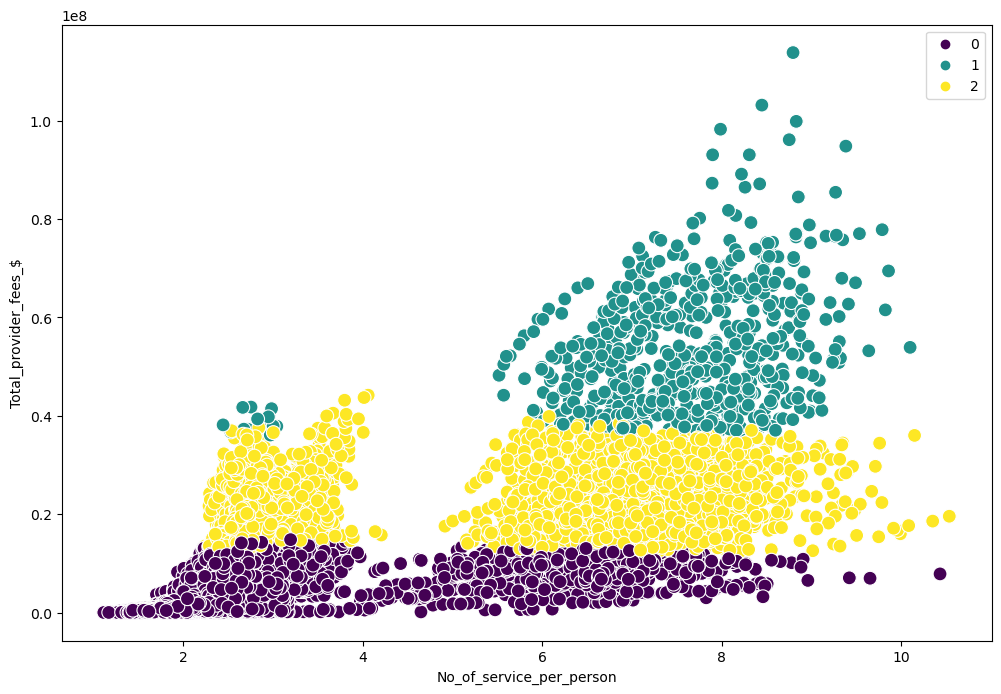

In [116]:
# Define the cluster labels you want to keep
clusters_to_keep = [1, 2, 0]

# Create a mask for rows where the kmeans.labels_ is in clusters_to_keep
mask = [label in clusters_to_keep for label in kmeans.labels_]

# Create a new DataFrame with only the desired clusters
filtered_df = df_mbs_sa3_numerical_val[mask]

# Now the kmeans.labels_ also needs to be filtered
filtered_labels = kmeans.labels_[mask]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=filtered_df["No_of_service_per_person"],
    y=filtered_df["Total_provider_fees_$"],
    hue=filtered_labels,
    s=100,
    palette="viridis",  # Optionally, specify a color palette for clarity
)

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Total_provider_fees_$")  # Label y-axis.
plt.show()

    Cluster 0: Areas, services have low provider fees, usage is between 0-8
    Clusters 1: Provider fees between 0.2 to 0.4, usage varies between 0-10
    Clusters 2: high provider fees, usage is high between 6-10

In [104]:
df_mbs_sa3_numerical_val.columns

Index(['Total_mbs_paid_$', 'Total_provider_fees_$',
       'Out_of_pocket_cost_per_person', 'No_of_service_per_person',
       'Out_of_pocket_cost_per_service', 'clusters'],
      dtype='object')

In [107]:
df_mbs_sa3_numerical_val.groupby("clusters").agg(
    {
        "Total_mbs_paid_$": ["mean", "median"],
        "Total_provider_fees_$": ["mean", "median"],
        "Out_of_pocket_cost_per_person": ["mean", "median"],
        "No_of_service_per_person": ["mean", "median"],
        "Out_of_pocket_cost_per_service": ["mean", "median"],
    }
)

Total_mbs_paid_$             Total_provider_fees_$              \
                     mean      median                  mean      median   
clusters                                                                  
0            3.520528e+06   2961537.0          4.387498e+06   3746522.0   
1            4.919832e+07  46242214.0          5.300039e+07  50794636.0   
2            1.816144e+07  16755041.0          2.133588e+07  20081763.0   

         Out_of_pocket_cost_per_person            No_of_service_per_person  \
                                  mean     median                     mean   
clusters                                                                     
0                            46.836825  26.215731                 2.648527   
1                            30.235767  28.081949                 7.529006   
2                            62.335030  42.164856                 4.925027   

                   Out_of_pocket_cost_per_service            
            median                           mean    median  
clusters                                                     
0         2.470911                      16.815467  9.258694  
1         7.616445                       4.348035  3.764047  
2         3.618661                      16.785956  9.175521

Further Analysis:

1. Areas, service or demographics that have high provider fees and low out of pocket costs
2. Areas, services or demographics that have service usage between 0-4 and 6-11

## Analysing Per Person Dataset 

### Extracting Data

In [135]:
df_mbs_sa3_all_person.columns

Index(['Year', 'StateTerritory', 'GeographicCode', 'GeographicAreaName',
       'GeographicGroup', 'ServiceLevel', 'Service', 'DemographicGroup',
       'MBS_per_100', 'No_of_patients', 'No_of_services',
       '%_People_had_service', 'Services_100_people', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'ERP', 'key_x', 'Out_of_Pocket',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_person',
       'No_of_service_per_person', 'Out_of_pocket_cost_per_service',
       'Patient_ERP_Flag', 'negative_income', 'no_income_or_not_applicable',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000',
       'average_income_$169000+', 'Population_demographic', 'Population',
       '%_out_of_pocket_by_$5200', '%_out_of_pocket_by_$13000',
       '%_out_of_pocket_

In [136]:
df_mbs_sa3_numerical_val = df_mbs_sa3_all_person[
    [
        "MBS_Rebate_pp_per_service",
        "Total_Provider_pp_per_service",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
    ]
]

### The elbow technique

In [137]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data.
kmeans = [
    KMeans(n_clusters=i) for i in num_cl
]  # Defines k-means clusters in the range assigned above.

In [138]:
score = [
    kmeans[i].fit(df_mbs_sa3_numerical_val).score(df_mbs_sa3_numerical_val)
    for i in range(len(kmeans))
]  # Creates a score that represents
# a rate of variation for the given cluster option.

score

[-106419874.31274982,
 -40803962.13608903,
 -21671383.466687746,
 -13142575.121459626,
 -9356963.994713113,
 -7706915.264760779,
 -6107099.955931837,
 -5142249.189678064,
 -4395621.098023742]

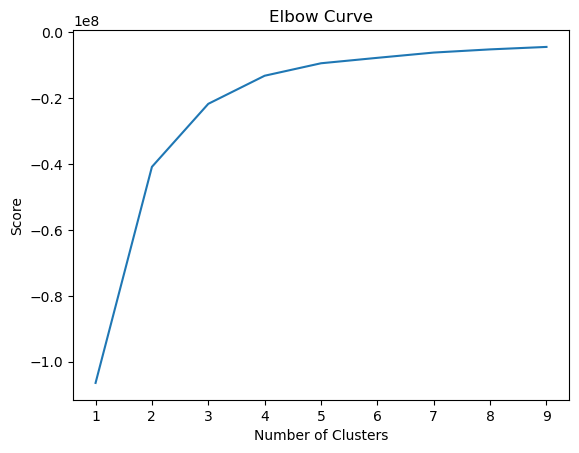

In [139]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl, score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")
pl.show()

### 3. k-means clustering

In [164]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3)
# Fit the k-means object to the data.

kmeans.fit(df_mbs_sa3_numerical_val)

KMeans(n_clusters=3)

In [165]:
df_mbs_sa3_numerical_val["clusters"] = kmeans.fit_predict(df_mbs_sa3_numerical_val)

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_26836/232422613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mbs_sa3_numerical_val["clusters"] = kmeans.fit_predict(df_mbs_sa3_numerical_val)


In [166]:
df_mbs_sa3_numerical_val.head()

,MBS_Rebate_pp_per_service,Total_Provider_pp_per_service,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_per_service,clusters
4,68.944781,83.663943,28.081822,1.907841,14.719162,1
11,127.027326,166.823488,86.673643,2.177940,39.796162,0
18,44.709134,56.902358,69.221382,5.677037,12.193224,1
25,25.014943,25.300359,0.472071,1.653979,0.285415,1
32,83.251933,132.693542,131.558149,2.660879,49.441608,2


In [167]:
df_mbs_sa3_numerical_val["clusters"].value_counts()

1    8807
2    3078
0    2975
Name: clusters, dtype: int64

In [159]:
df_mbs_sa3_numerical_val.columns

Index(['MBS_Rebate_pp_per_service', 'Total_Provider_pp_per_service',
       'Out_of_pocket_cost_per_person', 'No_of_service_per_person',
       'Out_of_pocket_cost_per_service', 'clusters'],
      dtype='object')

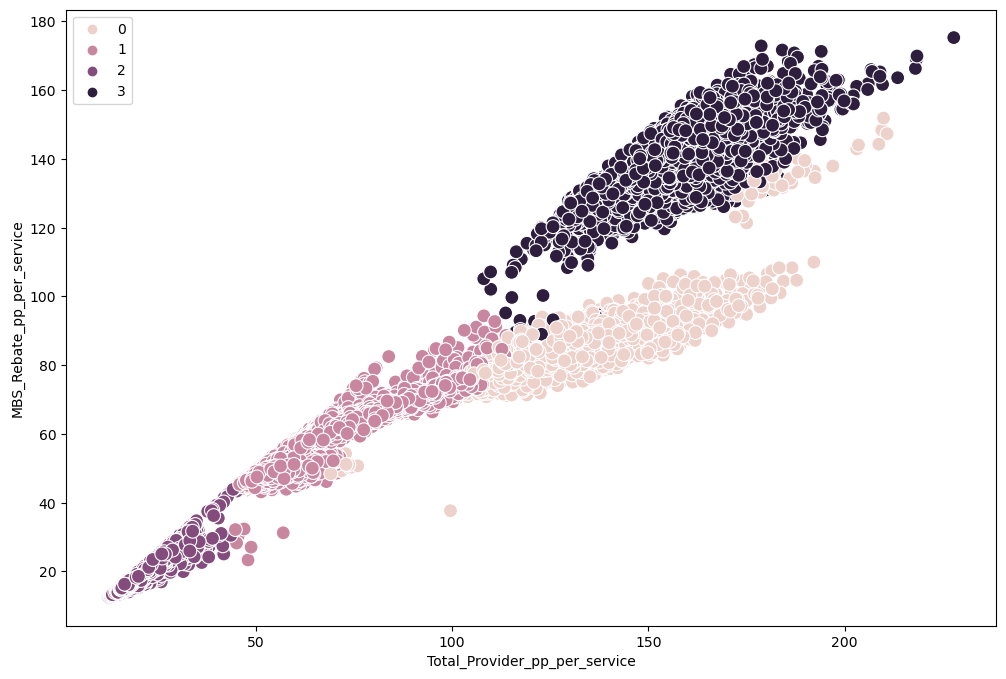

In [160]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_mbs_sa3_numerical_val["Total_Provider_pp_per_service"],
    y=df_mbs_sa3_numerical_val["MBS_Rebate_pp_per_service"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Total_Provider_pp_per_service")  # Label x-axis.
plt.ylabel("MBS_Rebate_pp_per_service")  # Label y-axis.
plt.show()

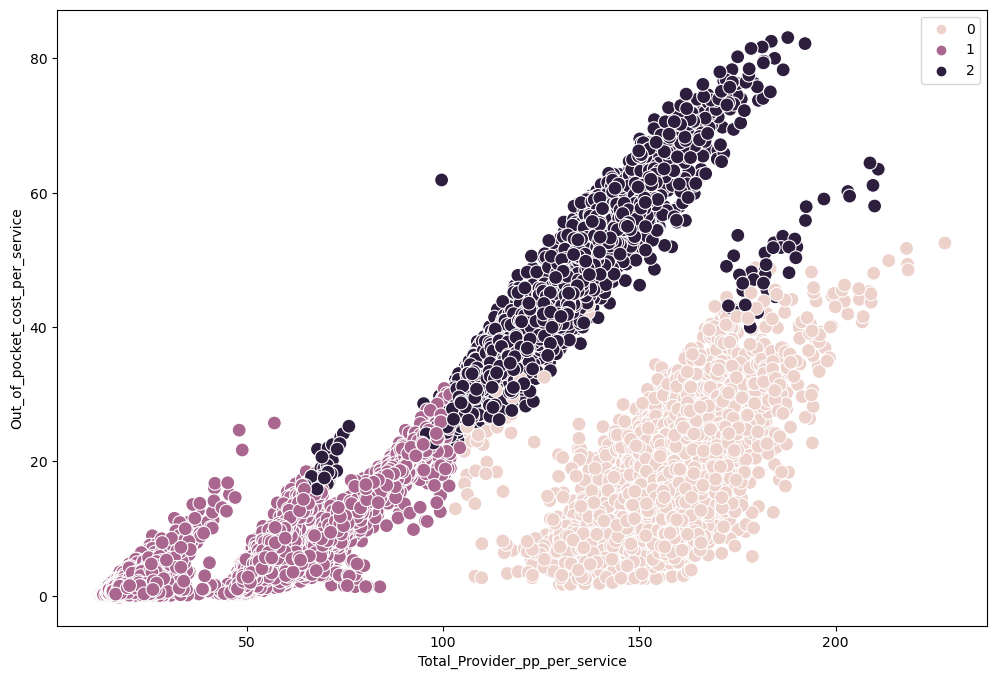

In [168]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_mbs_sa3_numerical_val["Total_Provider_pp_per_service"],
    y=df_mbs_sa3_numerical_val["Out_of_pocket_cost_per_service"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Total_Provider_pp_per_service")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_service")  # Label y-axis.
plt.show()

    Cluster 0: Service / Areas with provider fees over 125-220, have OOP per service between 0-$50
    Clusters 1: Services / Areas with provider fees between $10 -100 have OOP per service less than $30
    Cluster 2: Services / Areas with provider fees more than 100-200, have OOP per service is between 20-80

In [175]:
df_mbs_sa3_numerical_val.columns

Index(['MBS_Rebate_pp_per_service', 'Total_Provider_pp_per_service',
       'Out_of_pocket_cost_per_person', 'No_of_service_per_person',
       'Out_of_pocket_cost_per_service', 'clusters'],
      dtype='object')

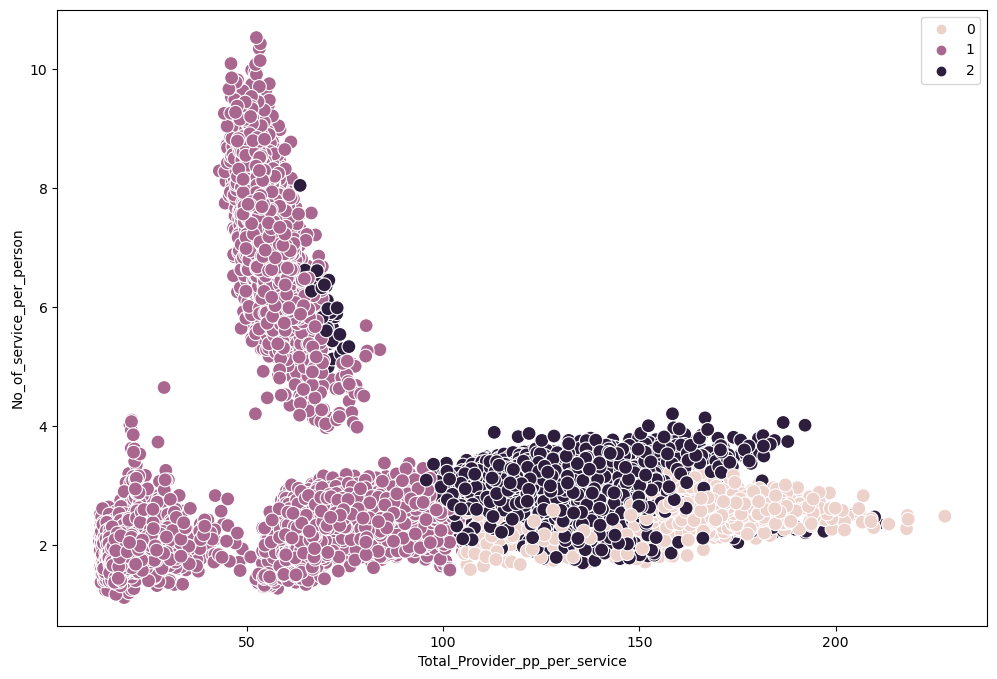

In [176]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_mbs_sa3_numerical_val["Total_Provider_pp_per_service"],
    y=df_mbs_sa3_numerical_val["No_of_service_per_person"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Total_Provider_pp_per_service")  # Label x-axis.
plt.ylabel("No_of_service_per_person")  # Label y-axis.
plt.show()

    1. Provider fees between 0-100, number of service used is less than 4 (low fees, low usage)
    2. Provider fees between 0-100, number of services used is between 4-10 (low fees, high usage)
    3. Provider fees is more than 100, number of services used is less than 4.

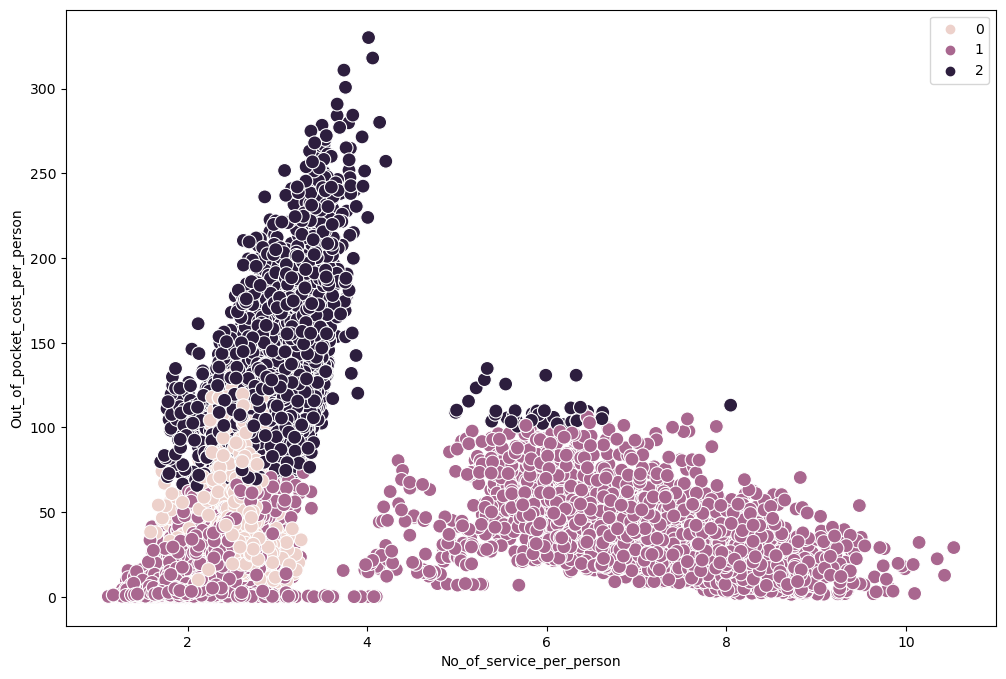

In [190]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_mbs_sa3_numerical_val["No_of_service_per_person"],
    y=df_mbs_sa3_numerical_val["Out_of_pocket_cost_per_person"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_person")  # Label y-axis.
plt.show()

No useful clusters, except for usage services per person more than 4 and less than 4

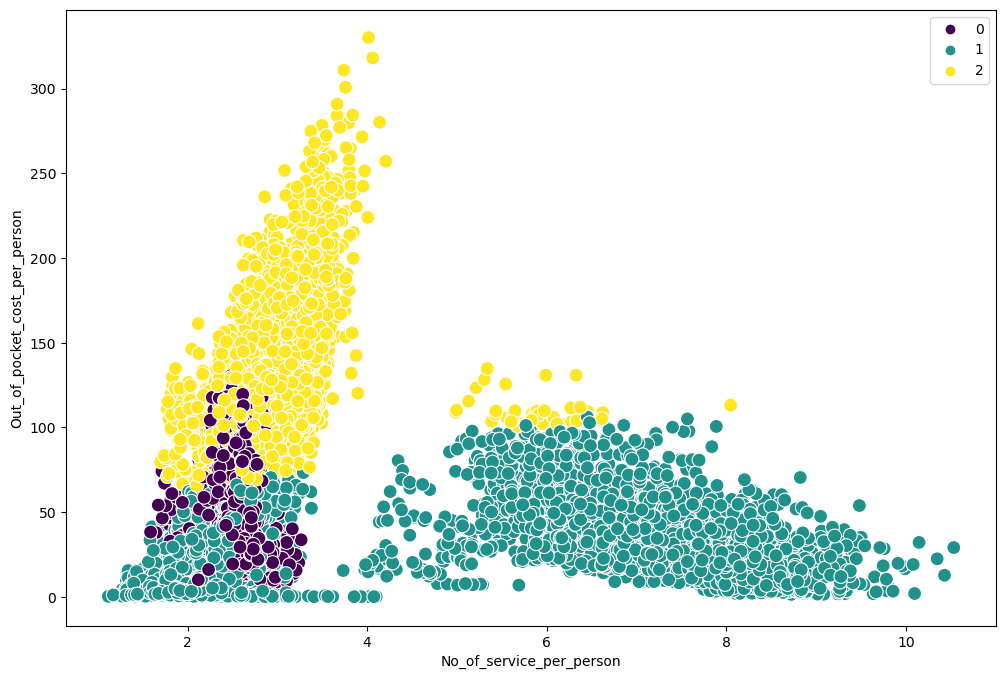

In [197]:
# Define the cluster labels you want to keep
clusters_to_keep = [1, 2, 0]

# Create a mask for rows where the kmeans.labels_ is in clusters_to_keep
mask = [label in clusters_to_keep for label in kmeans.labels_]

# Create a new DataFrame with only the desired clusters
filtered_df = df_mbs_sa3_numerical_val[mask]

# Now the kmeans.labels_ also needs to be filtered
filtered_labels = kmeans.labels_[mask]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=filtered_df["No_of_service_per_person"],
    y=filtered_df["Out_of_pocket_cost_per_person"],
    hue=filtered_labels,
    s=100,
    palette="viridis",  # Optionally, specify a color palette for clarity
)

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_person")  # Label y-axis.
plt.show()